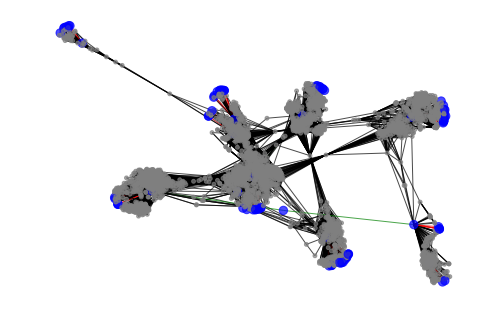

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline


with open('facebook_combined.csv', 'rb') as inf:
    next(inf, '')   # skip a line
    G = nx.read_edgelist(inf, delimiter=',', nodetype=int, encoding="utf-8")
    N = G.number_of_nodes()
    E = G.number_of_edges()
    
    edges = G.edges()
    colors = []
    paint_edges = []
    paint_edges2 = []
    paint_nodes = []
    
    local = list(nx.local_bridges(G, False))
    total = list(nx.bridges(G))
    
    # bridges
    for i in total :
        paint_edges.append(i)
        if i[0] not in paint_nodes :
            paint_nodes.append(i[0])
        if i[1] not in paint_nodes :
            paint_nodes.append(i[1])
    
    # local bridges
    for i in local :
        if i not in total :
            if i[0] not in paint_nodes :
                paint_nodes.append(i[0])
            if i[1] not in paint_nodes :
                paint_nodes.append(i[1])
            paint_edges2.append(i)
            
    for u, v in edges :
        if (u, v) in paint_edges :
            colors.append('red')
        elif (u, v) in paint_edges2 :
            colors.append('green')
        else :
            colors.append('black')
    
    color_map = []
    node_sizes = []
    
    for node in G:
        if node in paint_nodes :
            color_map.append('blue')
            node_sizes.append(70)
        else :
            color_map.append('grey')
            node_sizes.append(15)
        
    nx.draw(G,node_color = color_map, edge_color=colors, node_size = node_sizes, alpha = 0.7)
    plt.show()